# [Title:] Preprocessing the Data Release ZTF data for the Galactic Catalog

In [2]:
import pandas as pd
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import ast

In [10]:
data_all = pd.read_csv('Data_CSV/galactic_DR_Alert.csv')

In [5]:
ztf_id_list = [] 
catalog_list = []

for i in range(len(data_all)):
    ztf_id = data_all.loc[i, 'ztf_id']
    catalogs_id = ast.literal_eval(data_all.loc[i, 'cat_id'])
    for j in range(len(catalogs_id)):
        # Appending each catalog_id, not the whole list
        ztf_id_list.append(ztf_id)
        catalog_list.append(catalogs_id[j])

data_count = pd.DataFrame({
    'ztf_id': ztf_id_list,
    'catalog_id': catalog_list
})

data_id = data_count.groupby('catalog_id', sort=False, as_index=False).agg(list)

In [6]:
data_id['ztf_id_unique'] = None
data_id['n_alerts'] = 0

for j in range(len(data_id)):
    uniques = np.unique(data_id.loc[j, 'ztf_id'])
    data_id.at[j, 'ztf_id_unique'] = uniques.tolist()
    data_id.at[j, 'n_alerts'] = len(uniques)

In [9]:
data_id.sort_values('n_alerts',ascending=False).to_csv('Data_CSV//alert_x_catalog_id.csv',index=False)

In [51]:
data_id.loc[data_id['n_alerts']==5].to_csv('multiple_alerts_percatalog_id.csv', index=False)

In [31]:
data_id['n_alerts'].value_counts()

n_alerts
1    54582
2     9229
3     1510
4      129
5        6
Name: count, dtype: int64

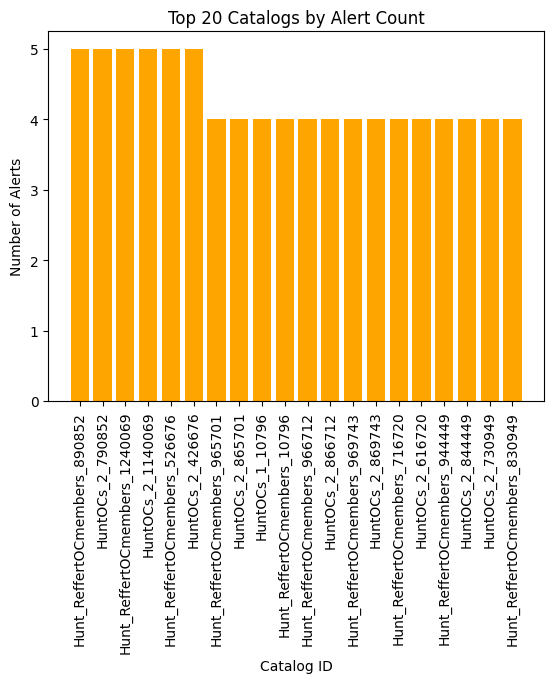

In [43]:
top_catalogs = data_id.nlargest(20, 'n_alerts')  
plt.bar(top_catalogs['catalog_id'], top_catalogs['n_alerts'], color='orange')
plt.xticks(rotation=90)
plt.xlabel("Catalog ID")
plt.ylabel("Number of Alerts")
plt.title("Top 20 Catalogs by Alert Count")
plt.show()

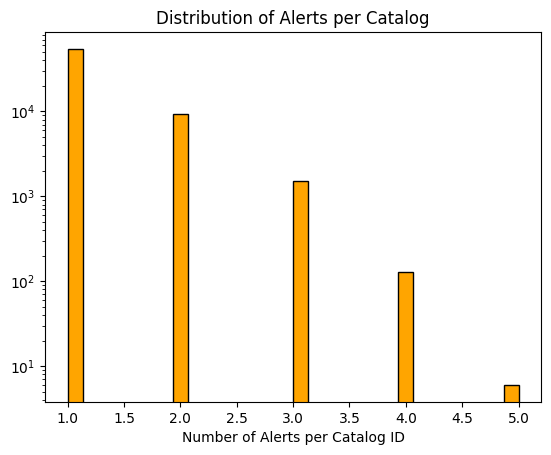

In [40]:
plt.hist(data_id['n_alerts'], bins=30, edgecolor='black', log=True, color='orange')
plt.xlabel("Number of Alerts per Catalog ID")
plt.title("Distribution of Alerts per Catalog")
plt.show()

# [EXTRA]

In [11]:
import ast

data_all['ra_mean'] = 0.0
data_all['dec_mean'] = 0.0

for i in range(len(data_all)):
    # convert string to list
    ra_list = ast.literal_eval(data_all.loc[i, 'ra'])
    dec_list = ast.literal_eval(data_all.loc[i, 'dec'])

    # take mean
    data_all.loc[i, 'ra_mean'] = np.median(ra_list)
    data_all.loc[i, 'dec_mean'] = np.median(dec_list)
    

In [12]:
#data_all.to_csv('Data_CSV/galactic_DR_Alert.csv')

In [ ]:
from astropy.table import Table

# Convert pandas DataFrame to Astropy Table
table = Table.from_pandas(data_all)

# Save to FITS
table.write("galactic_DR_Alert.fits", format="fits", overwrite=True)

In [ ]:
ztf_id_list = [] 
catalog_list = []


for i in range(len(data_all)):
    ztf_id = data_all.loc[i,'ztf_id']
    catalogs_id = data_all.loc[i,'cat_id']
    for j in range(len(catalogs_id)):
        #Appending
        ztf_id_list.append()
        catalog_list.append()
        
    
    

In [2]:
file_list = glob.glob('/media3/CRP8/TDE/data/DR_photometry/galactic/*.json')
file_list.sort()
print(len(file_list))

40886


In [ ]:
all_lcs = []

# Filter mapping
filter_map = {"zg": ("g", 1), "zr": ("r", 2), "zi": ("i", 3)}

for file in file_list:
    with open(file, "r") as f:
        data = json.load(f)
    
    ztf_id = file.split("/")[-1].split(".")[0]
    
    # Loop over different matches (keys)
    for obj_id in data.keys():
        lc = data[obj_id]["lc"]
        filt = data[obj_id]["meta"]["filter"]  # e.g., "zg"
        
        if filt not in filter_map:
            continue 
        
        band, fid = filter_map[filt]
        
        # Extract points
        for point in lc:
            all_lcs.append({
                "ztf_id": ztf_id,
                "obj_id": obj_id,
                "mjd": point["mjd"],
                "mag": point["mag"],
                "magerr": point["magerr"],
                "band": band,
                "fid": fid
            })

# Convert to dataframe
df = pd.DataFrame(all_lcs)
print(df.head())
print(df["band"].value_counts())


In [ ]:
data_lc = df.groupby('ztf_id', sort=False, as_index=False).agg(list)

In [ ]:
data_lc

In [11]:
data_alert = pd.read_parquet('/media3/CRP8/TDE/data/xmatch/galactic/')
data_alert = data_alert.groupby('objectId', sort=False, as_index=False).agg(list)
data_alert['top_class'] = [np.unique(data_alert['finkclass'].values[i]) for i in range(data_alert.shape[0])]
data_alert['ztf_id']= data_alert['objectId']
data_alert = data_alert.rename(columns={"ra": "ra_alert", "dec": "dec_alert"})
data_alert['ra_alert_mean'] = 0.0
data_alert['dec_alert_mean'] = 0.0

for i in range(len(data_alert)):
    # convert string to list
    ra_list = ast.literal_eval(data_alert.loc[i, 'ra_alert'])
    dec_list = ast.literal_eval(data_alert.loc[i, 'dec_alert'])

    # take mean
    data_alert.loc[i, 'ra_alert_mean'] = np.median(ra_list)
    data_alert.loc[i, 'dec_alert_mean'] = np.median(dec_list)
print('Number of objects in the Alert Dataset:',len(data_alert))

ValueError: malformed node or string: [182.8329942, 182.8330448, 182.833049, 182.8330222, 182.8332747, 182.8331054, 182.833054, 182.8330416, 182.833065, 182.8330748, 182.8330551, 182.8328799, 182.8330093, 182.8332478, 182.8330477, 182.8329871, 182.8330497, 182.8330624, 182.8330451, 182.8329929, 182.8332839, 182.8330479, 182.8329464, 182.8330546, 182.8331229, 182.8330658, 182.8332015, 182.832978, 182.8330728, 182.8330577, 182.8328868, 182.8331446, 182.8330144, 182.8330609, 182.8330876, 182.8330584, 182.8330954, 182.8331519, 182.8331103, 182.8331857, 182.8330418, 182.8331627, 182.8330956, 182.8331719, 182.8330479, 182.8330881, 182.8331359, 182.8329895, 182.833192, 182.8329364, 182.8332421, 182.8329638, 182.8330834, 182.8331382, 182.8330939, 182.8331625, 182.8330947, 182.8330612, 182.8331619, 182.8331894, 182.8332028, 182.8329921, 182.8331021, 182.8330859, 182.833054, 182.8330086, 182.8330943, 182.8328496, 182.8330594, 182.8332403, 182.8331625, 182.83303, 182.833097, 182.8330714, 182.8330201, 182.8330292, 182.8330646, 182.8330358, 182.8330119, 182.8329272, 182.8330591, 182.8329815, 182.8331574, 182.8329891, 182.8330719, 182.8332312, 182.8329377, 182.8331366, 182.8329641, 182.8330223, 182.8331015, 182.8330648, 182.8331283, 182.8331388, 182.8330338, 182.8330004, 182.833037, 182.8328791, 182.8330955, 182.8331746, 182.8330695, 182.8330312, 182.8332725, 182.8330708, 182.8330293, 182.833014, 182.8330184, 182.8330115, 182.8330908, 182.8330207, 182.8329185, 182.8330565, 182.832928, 182.8331485, 182.8330534, 182.8330698, 182.8330656, 182.8330435, 182.8330665, 182.8330028, 182.8329911, 182.8331923, 182.8330692, 182.8331311, 182.83303, 182.8330387, 182.8330567, 182.8331151, 182.8330195, 182.8330509, 182.8330967, 182.8332208, 182.8330235, 182.8329893, 182.8330499, 182.832989, 182.8330327, 182.832994, 182.8330793, 182.8329219, 182.8330519, 182.8330402, 182.8330049, 182.8331423, 182.8331151, 182.833063, 182.832999, 182.8331381, 182.8329319, 182.8330528, 182.8330706, 182.8330545, 182.8330413, 182.8331429, 182.8330635, 182.8331844, 182.8330424, 182.8330574, 182.8330705, 182.8330918, 182.8331179, 182.8333049, 182.8330387, 182.8330557, 182.8330416, 182.8330477, 182.8330075, 182.8330267, 182.8329529, 182.8329463, 182.8330628, 182.8331365, 182.8330912, 182.832929, 182.8332678, 182.8329111, 182.8330515, 182.8330357, 182.8330633, 182.8330485, 182.8331009, 182.8332081, 182.8330293, 182.8330025, 182.8330203, 182.8329068, 182.8330534, 182.8330987, 182.8331912, 182.8331269, 182.8331388, 182.8330471, 182.8330176, 182.8330331, 182.8331324, 182.8331165, 182.8333239, 182.8331379, 182.8330224, 182.8330347, 182.8330724, 182.8331186, 182.8330117, 182.8331068, 182.8331765, 182.8329608, 182.8330484, 182.8331596, 182.8329787, 182.8329468, 182.8330199, 182.8330184, 182.8330861, 182.8331053, 182.8330432, 182.8330624, 182.833065, 182.8330416, 182.8331054, 182.8330497, 182.8330477, 182.8330551, 182.8329942, 182.8329871, 182.833049, 182.8330222, 182.8330093, 182.8330448, 182.8328799, 182.8332747, 182.8330748, 182.8332478, 182.833054, 182.8328868, 182.8331229, 182.8330144, 182.8332015, 182.8330728, 182.8331857, 182.8330546, 182.8329929, 182.8330624, 182.8330451, 182.8332839, 182.8330658, 182.8331446, 182.8330609, 182.8330577, 182.8330876, 182.8330584, 182.8330954, 182.8330479, 182.8331519, 182.832978, 182.8329464, 182.8331103, 182.8330612, 182.8331619, 182.8329638, 182.8331382, 182.8330956, 182.8330939, 182.8330086, 182.8330479, 182.8330881, 182.8330943, 182.8330947, 182.8328496, 182.8332421, 182.8330418, 182.8331894, 182.8331625, 182.8331359, 182.8331627, 182.8331719, 182.8330594, 182.8332403, 182.8332028, 182.8329895, 182.8329921, 182.8331021, 182.833192, 182.8329364, 182.8330859, 182.8330834, 182.833054, 182.8330648, 182.8332312, 182.8329377, 182.8331015, 182.8330201, 182.83303, 182.8330119, 182.8329641, 182.8330223, 182.8331625, 182.8329272, 182.8330591, 182.8329815, 182.8331574, 182.8330358, 182.833097, 182.8331283, 182.8329891, 182.8330714, 182.8330719, 182.8330292, 182.8330646, 182.8331366, 182.8332725, 182.8328791, 182.8330955, 182.8331485, 182.8330695, 182.8330004, 182.8331746, 182.833037, 182.8330534, 182.8330708, 182.8330293, 182.8330312, 182.833014, 182.8330115, 182.8330184, 182.8330698, 182.8330908, 182.8331388, 182.8330338, 182.8330207, 182.8329185, 182.8330565, 182.832928, 182.8330692, 182.83303, 182.8331311, 182.8330028, 182.8330387, 182.8331151, 182.8330499, 182.8330656, 182.8330235, 182.8329893, 182.8329911, 182.8331923, 182.8330967, 182.8330435, 182.8330509, 182.8330665, 182.8330195, 182.8332208, 182.8330567, 182.8331429, 182.8330635, 182.8330574, 182.8329219, 182.8330705, 182.8330519, 182.8331381, 182.8330049, 182.8331423, 182.8331151, 182.833063, 182.832999, 182.8330402, 182.8330327, 182.8330413, 182.8330528, 182.832989, 182.8329319, 182.8330793, 182.8330706, 182.8330545, 182.832994, 182.8331844, 182.8330424, 182.8331179, 182.8330515, 182.8329111, 182.8330387, 182.8330557, 182.8330633, 182.832929, 182.8330075, 182.8330477, 182.8330267, 182.8329463, 182.8333049, 182.8330416, 182.8330357, 182.8330918, 182.8331365, 182.8330912, 182.8332678, 182.8330628, 182.8329529, 182.8330224, 182.8331186, 182.8331912, 182.8331269, 182.8331388, 182.8332081, 182.8330485, 182.8330293, 182.8330176, 182.8330331, 182.8330117, 182.8331324, 182.8330025, 182.8331009, 182.8331165, 182.8330203, 182.8329068, 182.8333239, 182.8330347, 182.8330987, 182.8330724, 182.8330534, 182.8331379, 182.8330471, 182.8330432, 182.8329608, 182.8330199, 182.8330484, 182.8331596, 182.8331068, 182.8330624, 182.8329468, 182.8330184, 182.8331765, 182.8330861, 182.8331053, 182.8329787]

In [10]:
data_alert[['ztf_id','cat_id','top_class','finkclass','ra_alert','dec_alert']]

,ztf_id,cat_id,top_class,finkclass,ra_alert,dec_alert
0,ZTF18aabvmsf,"[Hunt_ReffertOCmembers_507696, Hunt_ReffertOCm...","[PN?_Candidate, RRLyr, RRLyrae, Radio, Unknown...","[RRLyr, RRLyr, RRLyr, RRLyr, RRLyr, RRLyr, RRL...","[182.8329942, 182.8330448, 182.833049, 182.833...","[18.8299791, 18.8299247, 18.8299635, 18.829948..."
1,ZTF18aaajkrz,"[Hunt_ReffertOCmembers_527711, Hunt_ReffertOCm...","[GlCl?_Candidate, QSO, RGB*, RRLyr, RRLyrae, U...","[RRLyr, RRLyr, RRLyr, RRLyr, RRLyr, RRLyr, RRL...","[198.1754886, 198.1755048, 198.175503, 198.175...","[18.2771514, 18.2771769, 18.2771373, 18.277069..."
2,ZTF18abciamu,"[Hunt_ReffertOCmembers_527346, Hunt_ReffertOCm...","[GlCl?_Candidate, RGB*, RRLyr, RRLyrae, Unknown]","[RRLyr, RRLyr, RRLyr, RRLyr, RRLyr, RRLyr, RRL...","[198.2535862, 198.2536183, 198.2536053, 198.25...","[18.1916857, 18.1916508, 18.1916362, 18.191700..."
3,ZTF18aaaolyr,"[Hunt_ReffertOCmembers_527315, Hunt_ReffertOCm...","[RGB*, RRLyr, RRLyr_Candidate, RRLyrae, Unknown]","[RRLyr, RRLyr, RRLyr, RRLyr, RRLyr, RRLyr, RRL...","[198.236446, 198.2365237, 198.2365907, 198.236...","[18.1856755, 18.1856581, 18.1857155, 18.185652..."
4,ZTF19aateulj,"[Hunt_ReffertOCmembers_520018, Hunt_ReffertOCm...","[RRLyr, Star, Unknown]","[RRLyr, RRLyr, RRLyr, RRLyr, RRLyr, RRLyr, RRL...","[189.8850989, 189.8849567, 189.8848189, 189.88...","[-26.6395873, -26.6396974, -26.6396431, -26.63..."
...,...,...,...,...,...,...
88589,ZTF20acgkvve,[NGC_4372_11411],[Unknown],[Unknown],[287.2819195],[0.139458]
88590,ZTF22abivini,[NGC_4372_22344],[Unknown],[Unknown],[287.3983353],[-0.1869452]
88591,ZTF18abnnavh,[NGC_4372_3848],[Unknown],[Unknown],[287.4500917],[-0.1748455]
88592,ZTF18abctxth,[NGC_4372_1288],[Unknown],[Unknown],[287.4974463],[0.0947128]


In [ ]:
data_all = pd.merge(data_lc, data_alert, on="ztf_id", how="inner")

In [ ]:
data_all.to_csv('galactic_DR_Alert.csv')